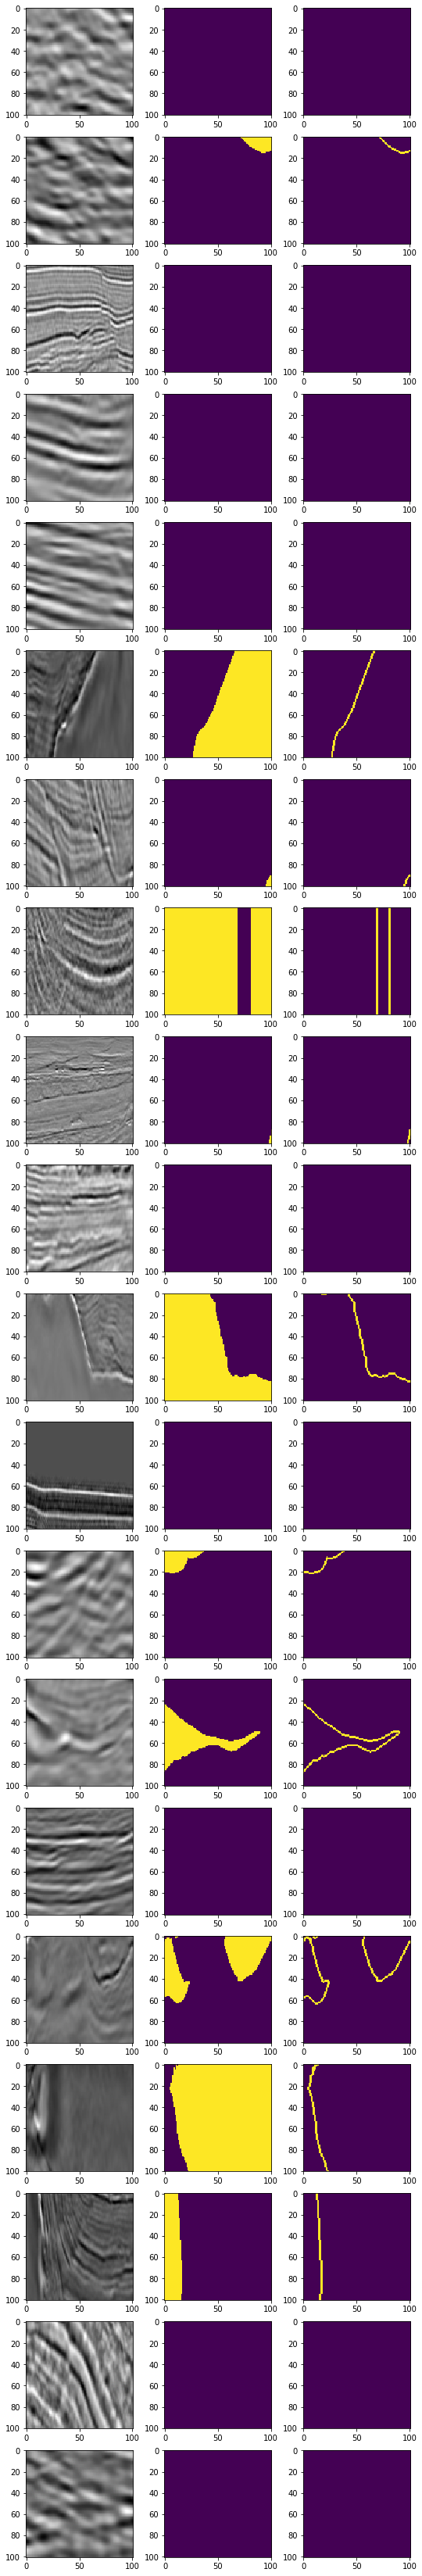

In [5]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.segmentation import find_boundaries
from ela import transformations, generator, random

import datasets
import utils



transforms_train = generator.TransformationsGenerator([
    
])

samples = utils.get_train_samples()
dataset = datasets.ImageDataset(samples, './data/train', transforms_train)


transforms = generator.TransformationsGenerator([
    transformations.Padding(((13, 14), (13, 14), (0, 0)))
])

transforms_image = generator.TransformationsGenerator([
    random.RandomColorPerturbation(std=1)
])


rows = 20
cols = 3
fig, ax = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))

for i in range(rows):
    img, mask = dataset[i]

    img = img.permute(1, 2, 0).numpy()
    mask = mask.squeeze().numpy()
    t = next(transforms)
    t_image = next(transforms_image)

    ax[i][0].imshow(img)
    ax[i][1].imshow(mask)
    ax[i][2].imshow(find_boundaries(mask, mode='thick'))